<a href="https://colab.research.google.com/github/abhiWriteCode/Autoencoders-in-Keras/blob/master/Autoencoders_in_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Building a Autoencoder using Keras

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Model
from keras import Sequential
from keras.layers import Dense, Flatten, Input
from keras.datasets import fashion_mnist

%matplotlib inline

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 4s 1us/step


In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

(-0.5, 27.5, 27.5, -0.5)

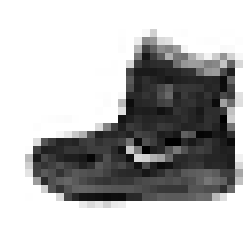

In [4]:
plt.imshow(X_train[0])
plt.axis('off')

In [0]:
def process_and_normalize(img_set):
  img_set = img_set / 255.0
  img_set = img_set.reshape(img_set.shape[0] ,28*28)
  return img_set

In [0]:
def resize_image(img_set):
  img_set = img_set * 255.0
  img_set = np.clip(img_set, 0, 255)
  img_set = img_set.reshape(img_set.shape[0] ,28, 28)
  return img_set  

In [7]:
X_train = process_and_normalize(X_train)
X_test = process_and_normalize(X_test)

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

## 28 x 28 (reshape) --> 784 --> 128 --> 32 (Botle Neck Layer)--> 128 --> 784 (reshape) --> 28 x 28

In [0]:
input_layer = Input(shape=(28*28,), name='Input_Layer')
hidden_layer_1 = Dense(units=128, activation='relu', name='Hidden_Layer_1')(input_layer)
botleneck_layer = Dense(units=32, activation='relu', name='Encoded_Layer')(hidden_layer_1)
hidden_layer_3 = Dense(units=128, activation='relu', name='Hidden_Layer_3')(botleneck_layer)
output_layer = Dense(units=784, activation='sigmoid', name='Output_Layer')(hidden_layer_3)

In [0]:
autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(loss='mean_squared_error', optimizer='rmsprop')

In [10]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (InputLayer)     (None, 784)               0         
_________________________________________________________________
Hidden_Layer_1 (Dense)       (None, 128)               100480    
_________________________________________________________________
Encoded_Layer (Dense)        (None, 32)                4128      
_________________________________________________________________
Hidden_Layer_3 (Dense)       (None, 128)               4224      
_________________________________________________________________
Output_Layer (Dense)         (None, 784)               101136    
Total params: 209,968
Trainable params: 209,968
Non-trainable params: 0
_________________________________________________________________


In [11]:
autoencoder.fit(X_train, X_train,
                epochs=100,
                batch_size=256,
                validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 63us/step - loss: 0.0449 - val_loss: 0.0310
Epoch 2/100
60000/60000 [==============================] - 2s 31us/step - loss: 0.0274 - val_loss: 0.0248
Epoch 3/100
60000/60000 [==============================] - 2s 32us/step - loss: 0.0235 - val_loss: 0.0242
Epoch 4/100
60000/60000 [==============================] - 2s 32us/step - loss: 0.0211 - val_loss: 0.0211
Epoch 5/100
60000/60000 [==============================] - 2s 32us/step - loss: 0.0194 - val_loss: 0.0187
Epoch 6/100
60000/60000 [==============================] - 2s 32us/step - loss: 0.0182 - val_loss: 0.0176
Epoch 7/100
60000/60000 [==============================] - 2s 32us/step - loss: 0.0174 - val_loss: 0.0166
Epoch 8/100
60000/60000 [==============================] - 2s 32us/step - loss: 0.0167 - val_loss: 0.0161
Epoch 9/100
60000/60000 [==============================] - 2s 32us/step - loss: 0.0161 - val_loss: 0.0

In [0]:
decoded = autoencoder.predict(X_test)

In [0]:
decoded = resize_image(decoded)
X_test = resize_image(X_test)

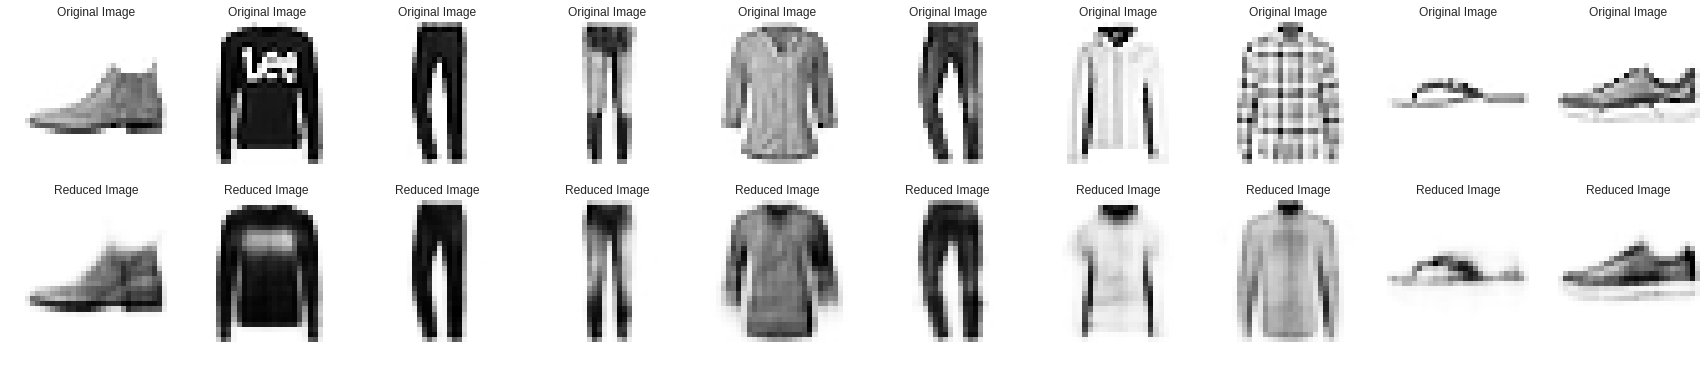

In [14]:
plt.figure(figsize=(30, 6))

n = 10
for i in range(n):
  plt.subplot(2, n, i+1)
  plt.imshow(X_test[i])
  plt.title('Original Image')
  plt.axis('off')
  
  plt.subplot(2, n, n+i+1)
  plt.imshow(decoded[i])
  plt.title('Reduced Image')
  plt.axis('off')